### Load packages

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### 2D example

In [61]:
# Step 1: Generate data
datax1 = np.random.normal(loc=2,scale=2,size=2000)
datax2 = np.random.normal(loc=6,scale=.1, size=1000)
datax3 = np.random.random(400)*12

datay1 = np.random.normal(loc=1,scale=1,size=2000)
datay2 = np.random.normal(loc=3,scale=3,size=1000)
datay3 = np.random.random(400)*2

rad = 45*np.pi/180
data3 = np.matmul(np.array([[np.cos(rad),-np.sin(rad)],[np.sin(rad),np.cos(rad)]]),np.vstack((datax3,datay3)))

df = pd.DataFrame({'x':np.hstack((datax1,datax2,data3[0]-1)), 'y':np.hstack((datay1,datay2,data3[1]+1))})
df.to_csv('2d_input.csv',index=False)

Step 2: Run `hvt` from the root directory
````
./hvt --input examples/2d_input.csv --output examples/2d_output.csv --export_bcs examples/2d_barycentric.csv --bdist 0.6 --sdist 0.01
````


````
hypervolume-t v0.1
--------------------
Loading input file... done (3400 points)
Adding barycenters to all pairs and triples within 0.6...  done (6249618 points = 152688 from pairs, 6093530 from triples)
Exporting barycentric subdivision to file... done
Sparsifying with minimum distance 0.01...  done (4028 points)
Exporting sparsified point cloud to file... done
--------------------
Finished in 310 seconds
````

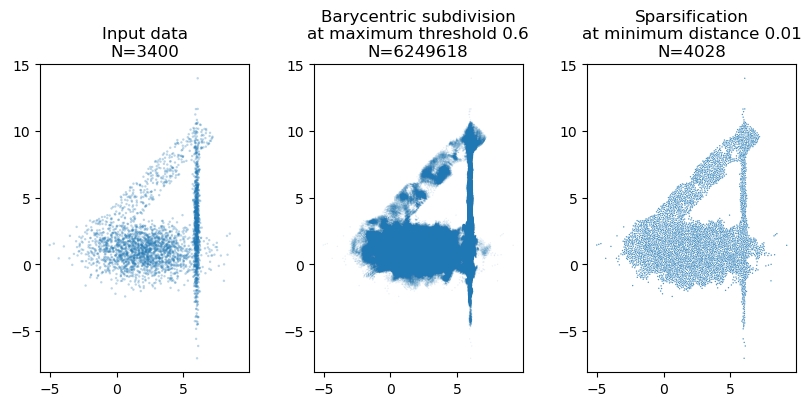

In [63]:
# Step 3: Visualize results
fig,axes = plt.subplots(1,3,figsize=(10,4))

data1 = pd.read_csv('2d_input.csv').to_numpy().T
data2 = pd.read_csv('2d_barycentric.csv').to_numpy().T
data3 = pd.read_csv('2d_output.csv').to_numpy().T

axes[0].set_title(f"Input data\nN={data1.shape[1]}")
axes[0].scatter(data1[0],data1[1],s=3,ec=None,alpha=.3)
axes[1].set_title(f"Barycentric subdivision\nat maximum threshold 0.6\nN={data2.shape[1]}")
axes[1].scatter(data2[0],data2[1],s=1,ec=None,alpha=.1)
axes[2].set_title(f"Sparsification\nat minimum distance 0.01\nN={data3.shape[1]}")
axes[2].scatter(data3[0],data3[1],s=1,ec=None,alpha=.8)

for ax in axes:
    ax.set_aspect('equal')

plt.show()